<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/Clustering_Kmeans_ElbowMethod_VisualizeClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning - Clustering

A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group.

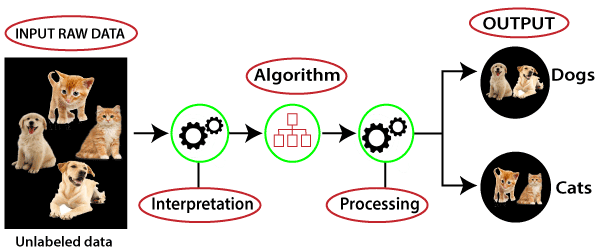

##K-Means Clustering

K-means algorithm explores for a preplanned number of clusters in an unlabelled multidimensional dataset, it concludes this via an easy interpretation of how an optimized cluster can be expressed. 

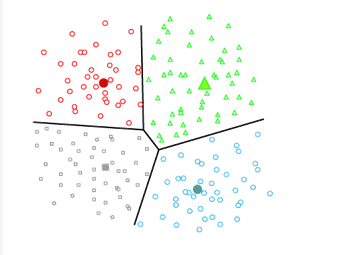

Specifically performing two tasks, the k-means algorithm

    1. Calculates the correct value of K-centre points or centroids by an iterative method
    2. Assigns every data point to its nearest k-centre, and the data pointts,
      closer to a particular k-centre, make a cluster. Therefore, data points,
      in each cluster, have some similarities and far apart from other clusters. 


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

###K-Means Clustering on dummy data

In [2]:
df=pd.DataFrame({'x1':[1,2,3,3.5,5.5,6,8,7,8],
                'x2':[1,5,2,4.2,4.4,6.5,2,5,7]})
df.head()

,x1,x2
0,1.0,1.0
1,2.0,5.0
2,3.0,2.0
3,3.5,4.2
4,5.5,4.4


Text(0, 0.5, 'X2')

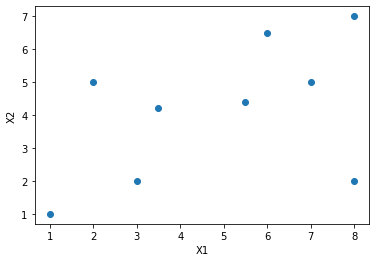

In [3]:
plt.scatter(df["x1"],df["x2"])
plt.xlabel("X1")
plt.ylabel("X2")

In [4]:
x=df

#model
model=KMeans(n_clusters=2)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

    cluster_centers_ : ndarray of shape (n_clusters, n_features)
    Coordinates of cluster centers. Final Cluster Centers

In [5]:
centroid = model.cluster_centers_
centroid

array([[2.375, 3.05 ],
       [6.9  , 4.98 ]])

    labels_ : ndarray of shape (n_samples,)
    Labels of each point Gives Cluster Label of each point.

In [6]:
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

    n_iter_ : int

    Number of iterations run by model to find accurate clusters.


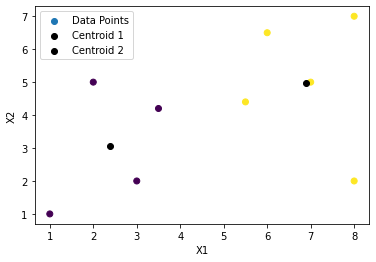

In [7]:
#plotting of points with cluster label and centroids
plt.scatter(df["x1"],df["x2"],c=model.labels_,label="Data Points")
plt.scatter(centroid[0][0],centroid[0][1],color="k",label="Centroid 1")
plt.scatter(centroid[1][0],centroid[1][1],color="k",label="Centroid 2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

In [8]:
df["Final Cluster Labels"]=model.labels_
df

,x1,x2,Final Cluster Labels
0,1.0,1.0,0
1,2.0,5.0,0
2,3.0,2.0,0
3,3.5,4.2,0
4,5.5,4.4,1
5,6.0,6.5,1
6,8.0,2.0,1
7,7.0,5.0,1
8,8.0,7.0,1


###K-means Clustering on Mall Customer data

In [9]:
df = pd.read_csv('/content/Mall_Customers.csv',index_col="CustomerID")
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


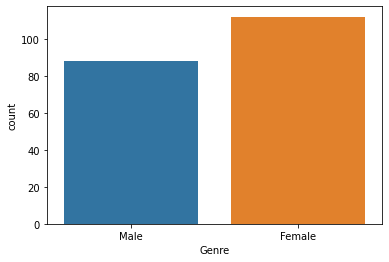

In [10]:
sns.countplot(data=df,x=df['Genre'])

In [11]:
df["Genre"]=df["Genre"].map({"Male":1,"Female":0})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73b9474fd0>,
      dtype=object)

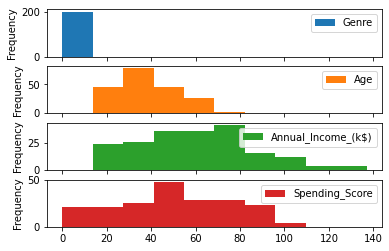

In [12]:
df.plot(kind='hist',subplots=True)

Elbow Method

    Inertia: It is the sum of squared distances of samples to their closest cluster center.
    We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [13]:
x = df

k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

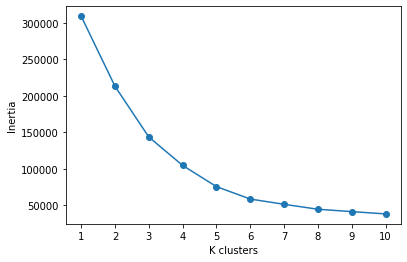

In [14]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

    To get the optimal number of clusters, we have to select the value of k at the “elbow” 
    i.e. the point after which the inertia start decreasing in a linear fashion. 
    Thus for the given data, we conclude that the optimal number of clusters for the data is 6.

In [19]:
#Fit model with optimal k value
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
model.n_iter_

11

In [31]:
model.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025]])

In [33]:
centroid=model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[ 0.46153846 32.69230769 86.53846154 82.12820513]
[ 0.39130435 45.2173913  26.30434783 20.91304348]
[ 0.52777778 40.66666667 87.75       17.58333333]
[ 0.39130435 25.52173913 26.30434783 78.56521739]
[ 0.41772152 43.08860759 55.29113924 49.56962025]


(5, 4)

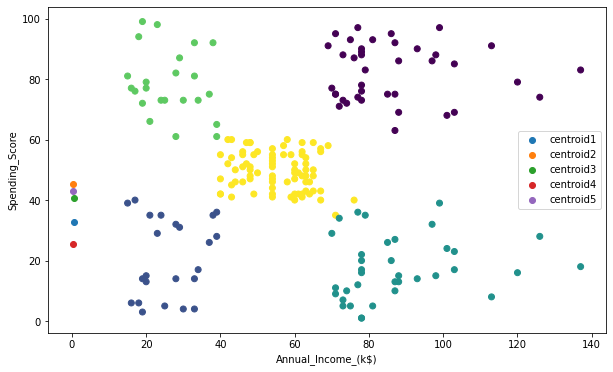

In [26]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.legend()

Conclusion :

    This kind of misplotting occurs due to shape of centroids.
    here shape is (5,4) so its confusing to plot.
    Better we can select new data to visualize.

###New Data for Visualization

In [35]:
X=df[["Annual_Income_(k$)","Spending_Score"]]

In [36]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0, 0.5, 'Inertia')

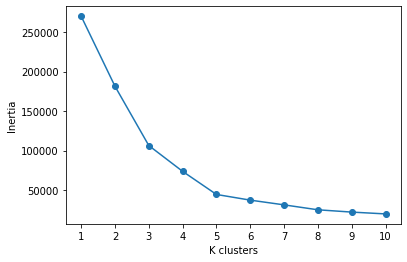

In [37]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia")

In [38]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

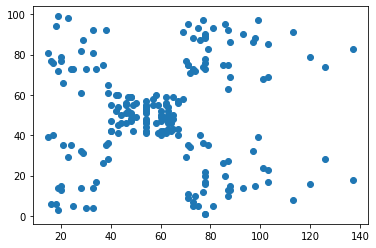

In [23]:
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"])

In [40]:
centroid=model.cluster_centers_
#just for checking centroid values
for i in range(centroid.shape[0]):
    print(centroid[i])
centroid.shape

[55.2962963  49.51851852]
[86.53846154 82.12820513]
[88.2        17.11428571]
[26.30434783 20.91304348]
[25.72727273 79.36363636]


(5, 2)

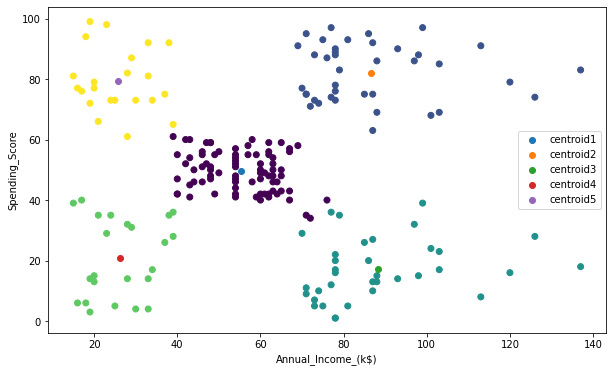

In [41]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df["Annual_Income_(k$)"],df["Spending_Score"],c=model.labels_)
for i in range(centroid.shape[0]):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score")
plt.legend()